<h1>PHY 2200 - Computational Physics</h1>
<h2>Spring 2023</h2>

<h2>Unit 1 Project - the van der Waals interaction</h2>

In [42]:
import numpy as np
from matplotlib import pyplot as plt

## Introduction and background

The <b>van der Waals interaction</b>, also known as the London dispersion force, is an attractive interaction between neutral, non-polar molecules. The origin of this interaction is often described qualitatively in terms of <i>spontaneously-induced dipole moments,</i> which arise due to quantum mechanical fluctuations in the electronic charge distribution of each molecule. By modeling these quantum mechanical fluctuations as random fluctuations in the charge separation within molecules, we will uncover the correct power-law dependence of the van der Waals interaction can be obtained by considering the average electrostatic potential energy over a number of realizations. 

Consider an idealized model of two physical dipoles interacting along in one dimension, as shown below. Each dipole consists of equal amounts of a positive and negative charge separated by distance $\delta r$.

<p><p>
    
<center>
    <img src="vdw.png" width=500>
</center>

To fix ideas, let us take two identical neutral molecules. Focusing on a single molecule, we assume at some instant in time a charge separation can occur by charges $\pm\delta q$ being instantaneously displaced by some distance $\delta r$. For simplicity, we take $\delta q$ fixed but will imagine that $\delta r$ fluctuates randomly in time. At the instant charges $\pm\delta q$ are separated by $\delta r$, the electric field created by this molecule at the location of the second molecule—some distance $r$ away will be given (to leading order in $\delta r/r$) by a simple dipole field.

$$E(r) = \frac{1}{4\pi \epsilon_{0}}\frac{2p}{r^{3}}$$

Here $p=\delta r\delta q$. Though the second molecule is overall charge-neutral, we allow for a finite polarizability $\alpha$ so that an external electric field $E$ will induce a dipole moment $p’$ in the second molecule given by $p'=\alpha E$. It is certainly true that electromagnetic fields propagate at finite speed—the speed of light in whatever medium separates the two points. We assume that the separation distance between the two molecules $r$ is sufficiently small so that this propagation can be approximated as instantaneous. That is, any instantaneous dipole fluctuation $p$ will result in an induced dipole moment in the second molecule, $p'\propto p$ so that $\langle pp'\rangle \propto \langle p^{2}\rangle >0$. Thus, the average potential energy will be nonzero for correlated dipole fluctuations. 

We assume each molecule exhibits an instantaneous dipole moment which varies randomly in time. At a particular instant, fixed, equal amounts of positive and negative charge $\delta q$ ($\delta q'$) will be separated by a total distance $\delta r$ ($\delta r'$) which is chosen randomly. Results will ultimately be averaged over a large number of realizations for fixed $r$. As soon as one molecule forms an instantaneous dipole, the second molecule will experience an induced dipole moment due to its finite polarizability $\alpha$. We assume this induction takes place instantaneously. With two instantaneous dipoles consisting of four individual point charges, we evaluate the Coulomb interaction energy and store this value. After repeating this step, the results are averaged to obtain $\langle U(r)\rangle$. Though the model is based on classical physics, it is worth noting that quantum mechanical effects are incorporated by the use of averaging multiple realizations and in the polarizability, which can only be calculated  
using quantum mechanics. Our model takes the details of the averaging procedure—the relative number of fluctuations for each molecule, the values of $\delta q$, $\delta q'$, and the distribution from which $\delta r$ and $\delta r'$ are chosen—and the value of the polarizability $α$ as inputs depending on the microscopic physics. 

It is known that the van der Waals potential decreases as $U(r) \propto r^{-6}$.

## Implementation 

The basic steps are:
- Choose a dipole (molecule 1 or molecule 2)

- Select a value of $\delta r$ from some sort of probability distribution; we choose a uniform distribution over $\delta r \in (0,\delta R)$ with $\delta R$ fixed. Provided $\delta R \ll r$, the value of $\delta R$ does not influence the main results
- For some choice of fixed $\delta q$, calculate the electric field at a distance $r$ from the center of molecule 1 given that molecule 1 undergoes charge separation:

$$ |\vec{E}(r)|= \frac{\delta q}{4\pi \epsilon_{0}} \left[\frac{1}{\left(r-\frac{\delta r}{2}\right)^2} -\frac{1}{\left(r+\frac{\delta r}{2}\right)^2}\right]$$

- Calculate the dipole moment induced in the other dipole due to this field using 
	$$\vec{p}'=\alpha \vec{E}(r)$$

- Model the induced dipole moment as a charge separation in which charges $\pm \delta q'$ are separated by a distance $\delta \vec{r}'= \vec{p}'/\delta q'$. 

- Calculate the instantaneous Coulomb interaction energy due to the four point charges

	$$U(r)=\frac{\alpha \delta q\delta q'}{4\pi\epsilon_0 r}\left[\frac{-1}{\left(1+ \frac{\delta r + \delta r'}{2r}\right)} + \frac{1}{\left(1+ \frac{\delta r - \delta r'}{2r}\right) } + \frac{1}{\left(1- \frac{\delta r - \delta r'}{2r}\right)}  + \frac{-1}{\left(1- \frac{\delta r + \delta r'}{2r}\right) }\right]$$

- Repeat these steps many times for each value of $r$ and average to obtain $\langle U(r)\rangle$. Then demonstrate that $\langle U(r)\rangle \propto r^{-6}$. That is, the van der Waals potential decays as the <i>sixth</i> power of separation.

A template is provided below in which you will fill in critical parts of these steps.

First, here are some contants and arrays that will be useful. Take a moment to understand what all these numbers are. 

- `a` represents the polarizability $\alpha$. 
- `dR` is the maximum separation between the two charges $-\delta q$ and $+\delta q$.
- `dq` is the amount of charge which is separated within each molecule, $\delta q$.
- The constant $\frac{1}{4\pi\epsilon_{0}}$ is clunky. We will refer to this lump of stuff as `K`. It turns out setting `K=1` does not change the end result (why?). 
- We are trying to calculate $U(r)$ and average it. `N` refers to how many separations $r$ we use. `rmin` and `rmax` are the smallest and largest separations, respectively.
- `U` is an array that will store the average values of $U(r)$ that we compute.
- Recall that we are averaging $U(r)$ over some number of random dipole orientations within the molecules. `N2` is the number of such samples.

In [43]:
a = 1.0   #polarizability of each molecules
dR = 0.1  #scale of position fluctuations
dq = 1.0  #amount of charge separated +/- dq

K = 1.0   #constant in Coulomb's law, 1/(4 pi epsilon_0)

N = 50    #number of positions to sample
rmin = 2.0 #minimum r sampled
rmax = 5.0 #maximum r sampled
r = np.linspace(rmin,rmax,N) #sampled positions


U = np.zeros(N)            #array to store U(r)

N2 = 500 #number of fluctuations sampled per separation

Let us break up the process into a number of small steps and define functions that will take care of these small tasks.

First, write a function that returns a value of $\delta r$ randomly drawn from the range $\delta r \in [-\frac{1}{2}\delta R,\frac{1}{2}\delta R]$:

In [44]:
# going to use random because I want to and I like uniform
import random

def randomδr(δR):
    return random.uniform(-.5*δR,.5*δR)
    raise NotImplementedError()

The fundamental task is to evaluate the potential energy $U(r)$ described above. Write a function to return the potential energy given $\frac{1}{4\pi \epsilon_{0}}\rightarrow $ `K`, $\delta r\rightarrow $ `δr`, $\delta r'\rightarrow $ `δr2`, $r\rightarrow $ `r`, $\delta q\rightarrow $ `δq`, $\delta q'\rightarrow $ `δq2`.

In [49]:
def Uexact(K,r,δr,δr2,δq,δq2):
    return ((K*δq*δq2)/r) * ((-1/(1+((δr+δr2)/(2*r))))+(1/(1+((δr-δr2)/(2*r))))+(1/(1-((δr-δr2)/(2*r))))+(-1/(1-((δr+δr2)/(2*r)))))
    raise NotImplementedError()

Now write a function to determine the dipole electric field created by one molecule (charge separation $\pm\delta q$, $\delta r$) at a distance $r$,

$$E(r) = \frac{1}{4\pi\epsilon_{0}}\frac{\delta q}{\left(r-\frac{\delta r}{2}\right)^{2}} - \frac{1}{4\pi\epsilon_{0}}\frac{\delta q}{\left(r+\frac{\delta r}{2}\right)^{2}}$$

Here, $\frac{1}{4\pi \epsilon_{0}}\rightarrow $ `K`, $\delta r\rightarrow $ `δr`, $r\rightarrow $ `r`, $\delta q\rightarrow $ `δq`.

In [50]:
def dipoleE(K,r,δr,δq):
    return K * (δq/(r-(δr/2))**2) - K * (δq/(r+(δr/2))**2)

Now we arrive at the core of the program. The next task is to write a function which makes use of the previously defined functions and evaluates the energy for one realization of a dipole fluctuation. Since we want to model the case where <i>both</i> molecules are fluctuating, we need a further condition which will randomly select which molecule is exhibiting the dipole moment in each realization.

In [60]:
def Usample(K,dR,dq,r,a):
    p = np.random.rand()
    if (p > 0.5): #for this half, let molecule 1 exhibit a dipole moment dr dq
        #set deltr = randomly chosen value in the range [-δR/2,δR/2]
        δr = randomδr(dR)
        δq = dq
#        raise NotImplementedError()
        
        #calculate the electric field E1 at a distance r due to 
        #the field created by the dipole
        E1 = dipoleE(K,r,δr,δq)
#        raise NotImplementedError()
        
        #induced dipole moment in second dipole
        p2 = a*E1 #note E1 is what you just computed
        δq2 = dq
        δr2 = p2/δq2
        
        
    else: #if p<=0.5 repeat the previous steps 
        #Hint: it's basically the same steps but deltr<->deltr2, 
        #deltq <-> deltq2, p1 <-> p2, etc.
        δr2 = randomδr(dR)
        δq2 = dq
#        raise NotImplementedError()
        
        #calculate the electric field E1 at a distance r due to 
        #the field created by the dipole
        E1 = dipoleE(K,r,δr2,δq2)
        
        #induced dipole moment in second dipole
        p = a*E1 #note E1 is what you just computed
        δq = dq
        δr = p/δq
        
    #Now that all the deltas are fixed,
    #evaluate Coulomb electrostatic potential energy Uo due to this configuration
    Us = Uexact(K,r,δr,δr2,δq,δq2)
#    raise NotImplementedError()
    return Us

Now that the heavy lifting is done, we just need to make a big nested loop to sample a large number of realizations at each position.

In [61]:
for i in range(0,N): #loop of values of r[i]
    Usum = 0.0 #add up all values U(r[i]) we get from these samples
    for j in range(0,N2):
        #Update Uo = Uo + (...) where (...) is another sample of the energy at r[i]
        Usum += Usample(K,dR,dq,r[i],a) 
#        raise NotImplementedError()
    U[i] = Usum/N2

At this point, you should be able to make a plot of $\langle U(r)\rangle$ vs. $r$ and see some reasonably smooth trend. Since $\langle U(r)\rangle <0$ (or at least it <i>should</i> be), I would recommend plotting $-\langle U(r)\rangle$ vs. $r$.  

Since you're expecting a power-law dependence, find the appropriate type of plot that depicts this behavior as <i>linear</i>. Note that since $\langle U(r)\rangle <0$, you'll want to work with $\ln[-\langle U(r)\rangle]$ if you take the logarithm of that quantity.

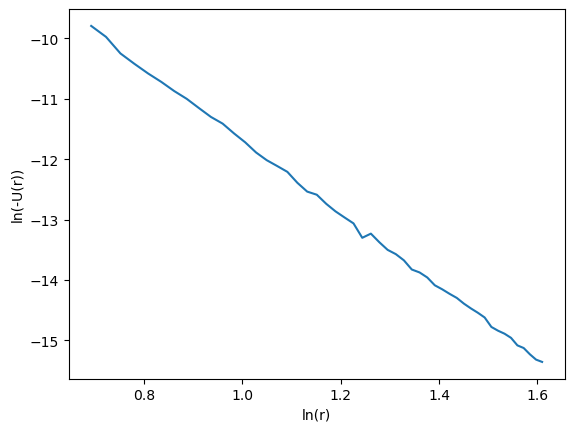

In [62]:
plt.plot(np.log(r), np.log(-U))
plt.xlabel('ln(r)')
plt.ylabel('ln(-U(r))')
plt.show()

Once you have the axes scaled so that the trend looks (approximately) like a straight line, complete the following function by using `polyfit` to obtain and return the value of $n$ such that

$$\langle U(r)\rangle \approx - \frac{C}{r^{n}}$$

Is this consistent with what is known about the van der Waals attraction?

In [67]:
def exponent(r,U):
    slope, _ = np.polyfit(np.log(r), np.log(-U), 1)
    return slope

exponent(r,U)

-6.02276257368163

Use Markdown to explain in words what you have uncovered about the van der Waals interaction. Describing the steps (not explaining the program, but the <i>overall process</i>) and note what value you obtained for the power-law exponent.

Questions to consider:

- Does your result agree with theory?
- Do you have confidence in your result? ("It's close..." is not an acceptable answer)
- How does the result change if you vary things like `N`, `N2`, `rmin`, `rmax`. Should/does any of those make a significant difference compared to the others?

YOUR ANSWER HERE

In this project, I have explored how van der Waals interaction affects molecules. While we can create a model in one program, it is easier to split it up into sections:<br>
    1) (function) create a set of randomized values for δR (distance between high/low charges on a molecule)<br>
    2) (function) calculate the potential energy of the two molecules<br>
    3) (function) calculate the dipole electric field of one molecule given a distance<br>
    4) (function) use the previous functions (1, 3) to calculate the potential energy at one point<br>
    5) (function) make a loop to repeat the previous function N times (for each position)<br>
    6) plot the results (potential energy U vs distance r)<br>
    7) find the slope<br>
    <br>
My results agree with the theory because the interaction appears to decay at a factor of 6, like what was predicted. Having done it for the first time, I am not confidence in my result but I'm pretty sure I did everything right. It is not exactly 6, but it is within a reasonable margin. Repeating this experiment would not drastically (it would change decimal places, but nothing major) change that. However, changing rmin and rmax would affect the data and the result because they represent the lower and upper bound separations, respectively. 